# 数据集基本使用

## 1) 导入数据集

In [5]:
from nuscenes.nuscenes import NuScenes, NuScenesExplorer
from nuscenes.can_bus.can_bus_api import NuScenesCanBus

version = "v1.0-mini"
dataroot = "/root/autodl-tmp/data/nuScenes"
nusc = NuScenes(version,dataroot,verbose=True)
"创建 NuScenes 对象   当 verbose=True 时，在创建对象的过程中可能会输出一些详细的信息"

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.392 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


'创建 NuScenes 对象   当 verbose=True 时，在创建对象的过程中可能会输出一些详细的信息'

## 2)查看某一场景中的信息

In [6]:
nusc.scene[0]

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [7]:
for sces in nusc.scene:
    sce = nusc.get("scene", sces['token'])
    print(sce['name'],sce['nbr_samples'])

scene-0061 39
scene-0103 40
scene-0553 41
scene-0655 41
scene-0757 41
scene-0796 40
scene-0916 41
scene-1077 41
scene-1094 40
scene-1100 40


In [8]:
sce.keys()

dict_keys(['token', 'log_token', 'nbr_samples', 'first_sample_token', 'last_sample_token', 'name', 'description'])

## 3)获取样本sample

In [10]:
"获取第一个sample的token值"
sce['first_sample_token']

'a480496a5988410fbe3d8ed6c84da996'

In [12]:
"这是这个场景的第一个数据帧"
samp = nusc.get("sample", sce['first_sample_token'])
samp


{'token': 'a480496a5988410fbe3d8ed6c84da996',
 'timestamp': 1542800987947699,
 'prev': '',
 'next': 'b993550e60054741983f8052ba97b0b0',
 'scene_token': 'e233467e827140efa4b42d2b4c435855',
 'data': {'RADAR_FRONT': '511dba7f4aec41ea8baa9019ba97413c',
  'RADAR_FRONT_LEFT': 'b5a62f9cf0ac444cbd90c2f9ba7fedbf',
  'RADAR_FRONT_RIGHT': 'e95132afd0604448b6d522a09bad7e2d',
  'RADAR_BACK_LEFT': 'cb1a9aa2b8154fde9442eaa9fe11a958',
  'RADAR_BACK_RIGHT': 'f2008e1cb0194ee49a85243ed8261955',
  'LIDAR_TOP': 'b723df2123fe473d85512c9d02156c27',
  'CAM_FRONT': '51ceae8a5ecc4730950666723c135bc8',
  'CAM_FRONT_RIGHT': '4a85ae2a6329487abed596b0b7b6dfa4',
  'CAM_BACK_RIGHT': '646b51a45a2b4494a918ff89d36027e2',
  'CAM_BACK': 'd340a8d85c874b8d9e9ddf51a82a5908',
  'CAM_BACK_LEFT': 'c418396afb5a43a4af9a3b76278fd8d6',
  'CAM_FRONT_LEFT': '255a0637ea9a461989d7fb20f4ee126c'},
 'anns': ['9ca2a9ab9b5041278eea928681e09d89',
  '9dfee0c127f548acb80bf95610437acb',
  'b2222d3c49c447ba91247501e97d772b',
  '723bee443cf6433a9

## 4)样本数据

In [13]:
samp['data']

{'RADAR_FRONT': '511dba7f4aec41ea8baa9019ba97413c',
 'RADAR_FRONT_LEFT': 'b5a62f9cf0ac444cbd90c2f9ba7fedbf',
 'RADAR_FRONT_RIGHT': 'e95132afd0604448b6d522a09bad7e2d',
 'RADAR_BACK_LEFT': 'cb1a9aa2b8154fde9442eaa9fe11a958',
 'RADAR_BACK_RIGHT': 'f2008e1cb0194ee49a85243ed8261955',
 'LIDAR_TOP': 'b723df2123fe473d85512c9d02156c27',
 'CAM_FRONT': '51ceae8a5ecc4730950666723c135bc8',
 'CAM_FRONT_RIGHT': '4a85ae2a6329487abed596b0b7b6dfa4',
 'CAM_BACK_RIGHT': '646b51a45a2b4494a918ff89d36027e2',
 'CAM_BACK': 'd340a8d85c874b8d9e9ddf51a82a5908',
 'CAM_BACK_LEFT': 'c418396afb5a43a4af9a3b76278fd8d6',
 'CAM_FRONT_LEFT': '255a0637ea9a461989d7fb20f4ee126c'}

In [14]:
samp['anns']

['9ca2a9ab9b5041278eea928681e09d89',
 '9dfee0c127f548acb80bf95610437acb',
 'b2222d3c49c447ba91247501e97d772b',
 '723bee443cf6433a95293aac161590d5',
 '29d4a8be2e91426da373d2b3b36302d7',
 '53242fa89307473fb78e35492e638856',
 '5b5c0d29afd546038a828c5376e7812f',
 '1167ef49543546d5a5b8d72893194e50',
 'e9a0946245ea43bbba0e3ff4e0459693',
 'c8d0d58bc9454ca8992e7eb27febda09',
 'cadc01f06d054f6589f96a6b1883e6a6',
 '4c82d383f7f54af38612ecac4028698d',
 '318911c9e58c410285dabc3e5c13cb8b',
 'fedb34281be246299448d0647fb3b2df',
 'e23a1c2091954a5e95a58e640c461915',
 '1d157033eed84ca98ad7966abc40e165',
 'bada2928484242a4b4a55a5e26f727b1',
 '17d6e7b2b520493eaff9c559b08d7382',
 '4894b54b856841f5bc7957b641ebba6b',
 '63b7794e1e044d8c87321ea27ee58dc8',
 '0298f73c79f247e9bd04c44282ba60eb',
 'ce9fe32b49974f4092157b30d7f2c674',
 '31f0dc786d0b4f24b748d9d0ece7378f',
 'fb2873a3231945249b1fe1acf0cedf1d']

### 1、毫米波雷达

In [15]:
"这里选择的传感器为前方的毫米波雷达传感器"
sensor_radar = 'RADAR_FRONT'
radar_front_data = nusc.get('sample_data',samp['data'][sensor_radar])
radar_front_data

{'token': '511dba7f4aec41ea8baa9019ba97413c',
 'sample_token': 'a480496a5988410fbe3d8ed6c84da996',
 'ego_pose_token': '511dba7f4aec41ea8baa9019ba97413c',
 'calibrated_sensor_token': '09090db968494cc4bf39edad6821b0f2',
 'timestamp': 1542800987945363,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n015-2018-11-21-19-38-26+0800__RADAR_FRONT__1542800987945363.pcd',
 'prev': '',
 'next': 'e02405559c7c423d8277975d9a5d251e',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

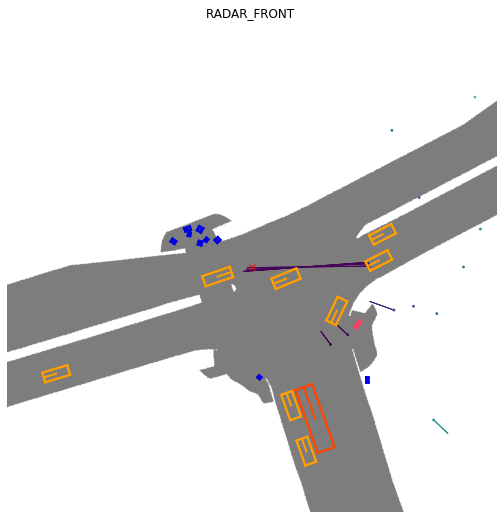

In [16]:
nusc.render_sample_data(radar_front_data['token'])

### 2、激光雷达

In [17]:
lidar_token = samp['data']['LIDAR_TOP']
lidar_sample_data = nusc.get('sample_data',lidar_token)
lidar_sample_data

{'token': 'b723df2123fe473d85512c9d02156c27',
 'sample_token': 'a480496a5988410fbe3d8ed6c84da996',
 'ego_pose_token': 'b723df2123fe473d85512c9d02156c27',
 'calibrated_sensor_token': '2f33eba3ec8d4637aad8010686d364fa',
 'timestamp': 1542800987947699,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-11-21-19-38-26+0800__LIDAR_TOP__1542800987947699.pcd.bin',
 'prev': '',
 'next': '59114bac6b5e4af4acf79b724afba447',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [18]:
lidar_ego_pose = nusc.get("ego_pose",lidar_sample_data['ego_pose_token'])
lidar_calibrated_data = nusc.get("calibrated_sensor",lidar_sample_data['calibrated_sensor_token'])

In [19]:
lidar_ego_pose

{'token': 'b723df2123fe473d85512c9d02156c27',
 'timestamp': 1542800987947699,
 'rotation': [0.28420771619881524,
  0.02224766942891785,
  0.012069468808417267,
  -0.9584285801147198],
 'translation': [1321.390767646126, 903.7547711424545, 0.0]}

In [20]:
lidar_calibrated_data

{'token': '2f33eba3ec8d4637aad8010686d364fa',
 'sensor_token': 'dc8b396651c05aedbb9cdaae573bb567',
 'translation': [0.943713, 0.0, 1.84023],
 'rotation': [0.7077955119163518,
  -0.006492242056004365,
  0.010646214713995808,
  -0.7063073142877817],
 'camera_intrinsic': []}

#### 2.1矩阵表示

In [ ]:
import numpy as np
from pyquaternion import Quaternion
"四元数"

def get_matrix(calibrated_data):
    """这里就是用一个4*4的矩阵,是方便运算的变换矩阵,给的标定数据"""
    output = np.eye(4)
    output[:3,:3] = Quaternion(calibrated_data['rotation']).rotation_matrix
    output[:3,3] = calibrated_data['translation']
    
    return output  

In [ ]:
ego_to_global = get_matrix(lidar_ego_pose)
lidar_to_ego = get_matrix(lidar_calibrated_data)
lidar_to_global = ego_to_global @ lidar_to_ego
"4x4 旋转矩阵"
lidar_to_global

array([[-5.46803682e-01, -8.35160705e-01, -5.92649206e-02,
         1.32053459e+03],
       [ 8.37248777e-01, -5.45044086e-01, -4.40616625e-02,
         9.03175311e+02],
       [ 4.49657463e-03, -7.37125616e-02,  9.97269391e-01,
         1.79115266e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

### 3、图像数据

In [23]:
cams = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT']
intrinsic = np.eye(4)

#### 3.1内外参

In [24]:
for v,cam in enumerate(cams):
    camera_token = samp['data'][cam]
    camera_data = nusc.get('sample_data',camera_token)

    camera_ego_pose = nusc.get('ego_pose',camera_data['ego_pose_token'])# translation rotation
    camera_calibrated_data = nusc.get("calibrated_sensor",camera_data['calibrated_sensor_token'])# translation rotation
    intrinsic[:3,:3] = camera_calibrated_data['camera_intrinsic']
    " 相机内参"

In [ ]:
ego_to_globel = get_matrix(camera_ego_pose)# 这是此时相机拍照时候的，车身运动
camera_to_ego = get_matrix(camera_calibrated_data)# 这是相机相对车身的标定
camera_to_global = ego_to_globel @ camera_to_ego
"相机外参"
camera_to_global

array([[-6.19910844e-01,  2.09018448e-02,  7.84393816e-01,
         1.32073085e+03],
       [-7.83292342e-01,  4.27746525e-02, -6.20180164e-01,
         9.02727834e+02],
       [-4.65150824e-02, -9.98866078e-01, -1.01442160e-02,
         1.53257314e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

#### 3.2图像

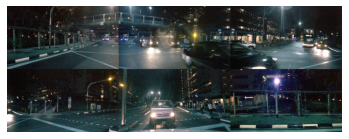

In [27]:
import os
import cv2
import matplotlib.pyplot as plt

result_colo = np.zeros((900 * 2, 1600 * 3, 3), dtype=np.uint8)
for v,cam in enumerate(cams):
    camera_token = samp['data'][cam]
    camera_data = nusc.get('sample_data',camera_token)
    camera_file = os.path.join(dataroot,camera_data['filename'])
    img = cv2.imread(camera_file)
    # 可视化数据
    row = v // 3
    col = v % 3
    # # 将图像放置在大画布的指定位置
    result_colo[row * img.shape[0]:(row + 1) * img.shape[0], 
    col * img.shape[1]:(col + 1) * img.shape[1]] = img

cv2.imwrite("/root/autodl-tmp/_Pytorch/B_NuScenes_SHOW/img.jpg",result_colo)
# jupytrt中显示图片
plt.imshow(result_colo)
plt.axis('off')  # 关闭坐标轴显示
plt.show()

### 4、标注数据

In [29]:
from nuscenes.utils.data_classes import Box 
for annotation_token in samp['anns']:
    annotation = nusc.get("sample_annotation",annotation_token)
    
    print(annotation['category_name'])
    name = annotation['category_name']
    
    box = Box(annotation['translation'],annotation['size'],Quaternion(annotation['rotation']))
    corners = box.corners().T
    global_corners = np.concatenate([corners, np.ones((len(corners), 1))],axis=1)



human.pedestrian.adult
vehicle.car
human.pedestrian.adult
vehicle.motorcycle
vehicle.car
human.pedestrian.adult
human.pedestrian.adult
vehicle.bus.rigid
vehicle.bus.rigid
human.pedestrian.adult
human.pedestrian.adult
vehicle.car
vehicle.car
vehicle.car
vehicle.car
vehicle.car
vehicle.motorcycle
vehicle.car
vehicle.car
human.pedestrian.adult
vehicle.car
human.pedestrian.adult
human.pedestrian.adult
vehicle.car


In [ ]:
"这是框的角点，其实我也没有搞清楚，这些点的顺序是怎么形容的-----------八个角点"
corners  

array([[ 1.31617442e+03,  9.04614710e+02,  1.12100000e+00],
       [ 1.31768558e+03,  9.03571982e+02,  1.12100000e+00],
       [ 1.31768558e+03,  9.03571982e+02, -3.09000000e-01],
       [ 1.31617442e+03,  9.04614710e+02, -3.09000000e-01],
       [ 1.31366642e+03,  9.00980018e+02,  1.12100000e+00],
       [ 1.31517758e+03,  8.99937290e+02,  1.12100000e+00],
       [ 1.31517758e+03,  8.99937290e+02, -3.09000000e-01],
       [ 1.31366642e+03,  9.00980018e+02, -3.09000000e-01]])

In [31]:
global_corners

array([[ 1.31617442e+03,  9.04614710e+02,  1.12100000e+00,
         1.00000000e+00],
       [ 1.31768558e+03,  9.03571982e+02,  1.12100000e+00,
         1.00000000e+00],
       [ 1.31768558e+03,  9.03571982e+02, -3.09000000e-01,
         1.00000000e+00],
       [ 1.31617442e+03,  9.04614710e+02, -3.09000000e-01,
         1.00000000e+00],
       [ 1.31366642e+03,  9.00980018e+02,  1.12100000e+00,
         1.00000000e+00],
       [ 1.31517758e+03,  8.99937290e+02,  1.12100000e+00,
         1.00000000e+00],
       [ 1.31517758e+03,  8.99937290e+02, -3.09000000e-01,
         1.00000000e+00],
       [ 1.31366642e+03,  9.00980018e+02, -3.09000000e-01,
         1.00000000e+00]])